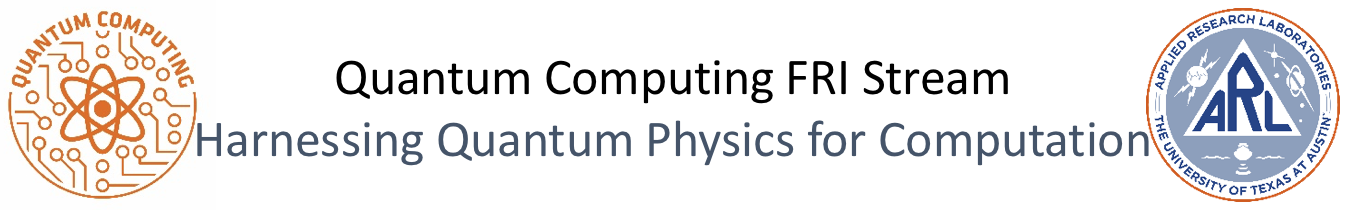

# Quantum Simulation
## Lesson 15


In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

## Today's Objectives

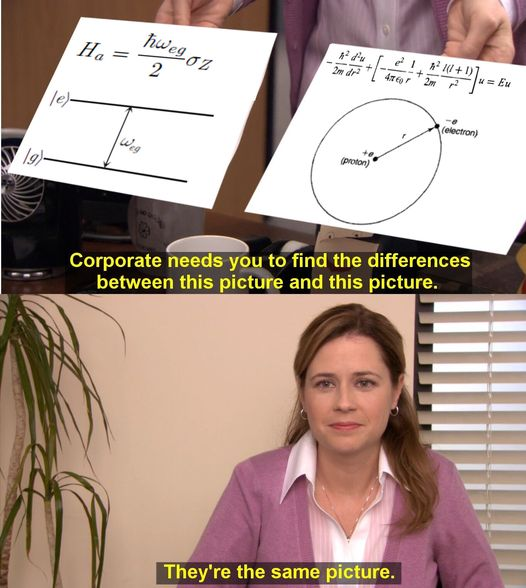

 - Compute the exponential of an operator
 - Find the time-evolved quantum state for a given initial quantum state and Hamiltonian
 - Prepare a set of gate operations to simulate the dynamics of a given Hamiltonian

## Quantum Simulations

-- First application of quantum computers envisioned by Feynman

-- Analog (Analog?) Quantum Simulation
 - Use one quantum system to model an analogous quantum system
 - Similar to analog simulation of differential equations
 - Example: coupled superconducting qubits as magnetic spin systems

-- Digital Quantum Simulation
 - Use a quantum computer to simulate system dynamics
 - Similar to digital simulation of differential equations
 - Universal simulation capability
 - Efficient for "local" Hamiltonians

## Time Evolution of Quantum States

Schödinger's Equation (in one dimension and with no potential) is given as $$i\hbar \frac{\partial}{\partial{t}}\lvert\psi\rangle = \frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \lvert\psi\rangle = \mathcal{H}\lvert\psi\rangle = E\lvert\psi\rangle$$

where $\mathcal{H}=\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2}$ is the Hamiltonian operator and $E$ is the (kinetic) energy

$\mathcal{H}\text{ is a Hermitian operator whose eigenvalues give the energy of the system. }(\mathcal{H}^{\dagger}=\mathcal{H})$

$\text{As you can see above, it is also related to the time evolution of the state.}$

$\text{If the quantum state is initially }|\psi_{0}\rangle \text{, then after time }t\text{ it will be }$

$$|\psi_{t}\rangle = \mathbf{U}_{t}|\psi_{0}\rangle$$

$$\text{where }\qquad\qquad \mathbf{U}_{t}= \exp{\left[ -i\frac{t}{\hbar}\mathcal{H} \right]}\qquad\qquad$$

$ $

$\text{Note: }\hbar \approx 1.0546\times10^{-34} \frac{\text{ kg m}^{2}}{\text{s}}\text{ is Planck's constant over }2\pi\text{ (sometimes called Dirac's constant)}$

## Operator Exponentials (Matrix Exponentials)

Defined by a series expansion:

$$e^{\mathbf{A}}=\mathbf{I}+\mathbf{A}+\frac{1}{2}\mathbf{A}^{2}+\frac{1}{6}\mathbf{A}^{3}+\cdots=\sum_{n=0}^{\infty}\frac{\mathbf{A}^{n}}{n!}$$

This is easy if the matrix is diagonal:

$$\mathbf{D}=
\begin{pmatrix}
d_{1} & 0 & \cdots & 0 \\ 0 & d_{2} & \cdots & 0 \\ \vdots & 0 & \ddots & 0 \\ 0 & \cdots & 0 & d_{n}
\end{pmatrix}
\qquad \Longrightarrow \qquad
e^{\mathbf{D}}=
\begin{pmatrix}
e^{d_{1}} & 0 & \cdots & 0 \\ 0 & e^{d_{2}} & \cdots & 0 \\ \vdots & 0 & \ddots & 0 \\ 0 & \cdots & 0 & e^{d_{n}}
\end{pmatrix}
$$

$ $

Otherwise, we need to diagonalize it:

$$ \mathbf{A}=\mathbf{UDU}^{\dagger} \quad\Longrightarrow\quad e^{\mathbf{A}}=e^{\mathbf{UDU}^{\dagger}} = \mathbf{U}e^{\mathbf{D}}\mathbf{U}^{\dagger} $$

$\text{In general, }e^{\mathbf{A}+\mathbf{B}}\neq e^{\mathbf{A}}e^{\mathbf{B}}$

$\text{However, if }\mathbf{A}\mathbf{B}=\mathbf{B}\mathbf{A}, \text{ then }e^{\mathbf{A}+\mathbf{B}}=e^{\mathbf{A}}e^{\mathbf{B}}$

$ $

$\text{If }\mathbf{AB}\neq \mathbf{BA}, \text{ we can use the Trotter formula:}$
$$e^{\mathbf{A}+\mathbf{B}}\approx \prod_{k=1}^{K} \left[ e^{\mathbf{A}/K}e^{\mathbf{B}/K} \right] \qquad\text{ for large }K.$$

$ $

#### Tip that may be useful at some point


$\text{In Python you can use expm:}\texttt{ from scipy.linalg import expm}$

## Example: Spin

$$\mathcal{H}=-\frac{1}{2}\hbar\omega\mathbf{Z}$$

$$
\begin{bmatrix}
\text{Spin Up State} & \qquad & \text{Spin Down State} \\
|\uparrow\rangle = |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} & & |\downarrow\rangle = |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\
\langle|\uparrow|\mathcal{H}|\uparrow\rangle = -\frac{1}{2}\hbar\omega & & \langle|\downarrow|\mathcal{H}|\downarrow\rangle = +\frac{1}{2}\hbar\omega
\end{bmatrix}
$$



$ $

$$\mathbf{U}_{t}=e^{-i (t/\hbar)\mathcal{H}}=e^{i(\omega t/2)\mathbf{Z}} =
\begin{pmatrix}
e^{i\omega t/2 (+1)} & 0 \\ 0 & e^{i\omega t/2 (-1)}
\end{pmatrix} = e^{i\omega t/2} \begin{pmatrix} 1 & 0 \\ 0 & e^{-i\omega t}\end{pmatrix}$$

$ $

$\text{In Qiskit: }\texttt{qc.p(-omega*t,q[0]) or qc.rz(omega*t,q[0])}$

### Spin: Physical Picture

$|\psi_{0}\rangle = \cos \frac{\theta}{2}|\uparrow\rangle + e^{i\phi}\sin\frac{\theta}{2}|\downarrow\rangle$

$\begin{align}
|\psi_{t}\rangle =& \mathbf{U}_{t}\left[ \cos \frac{\theta}{2}|\uparrow\rangle + e^{i\phi}\sin\frac{\theta}{2}|\downarrow\rangle \right] \\
=& e^{i\omega t/2}\begin{pmatrix} 1 & 0 \\ 0 & e^{-i \omega t} \end{pmatrix}
\begin{bmatrix} \cos\frac{\theta}{2} \\ e^{i\phi}\sin\frac{\theta}{2} \end{bmatrix} \\
=& e^{i \omega t/2} \begin{bmatrix} \cos\frac{\theta}{2} \\ e^{i (\phi-\omega t)}\sin\frac{\theta}{2}\end{bmatrix}
\end{align}$


### <font color=green>Exercise</font>

$1.\text{ Use Qiskit to prepare the state }\frac{1}{\sqrt{2}}\left[ |\uparrow\rangle + |\downarrow\rangle \right]$

$2.\text{ Using the Hamiltonian }\mathcal{H}=-\frac{1}{2}\hbar\pi\mathbf{Z},\text{ evolve the state to time }t=0.25$

$3.\text{ Measure the values for the }\mathbf{Z},\mathbf{X},\text{ and }\mathbf{Y} \text{ observables}$

$3.\text{ Compute and compare the expectation values for these observables}$


In [22]:
qcZ = QuantumCircuit(1,1)
qcZ.h(0)
qcZ.p(-np.pi*0.25, 0)
qcZ.measure(0,0)
qcZ.measure(0,0)

In [23]:
qcX = QuantumCircuit(1,1)
qcX.h(0)
qcX.p(-np.pi*0.25, 0)
qcX.h(0)
qcX.measure(0,0)

In [24]:
qcY = QuantumCircuit(1,1)
qcY.h(0)

qcY.h(0)
qcY.sdg(0)
qcY.p(-np.pi*0.25, 0)
qcY.measure(0,0)

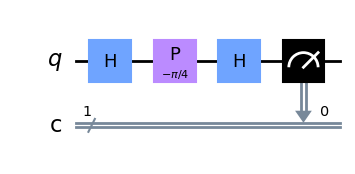

In [25]:
qcX.draw('mpl')

{'1': 117, '0': 907}


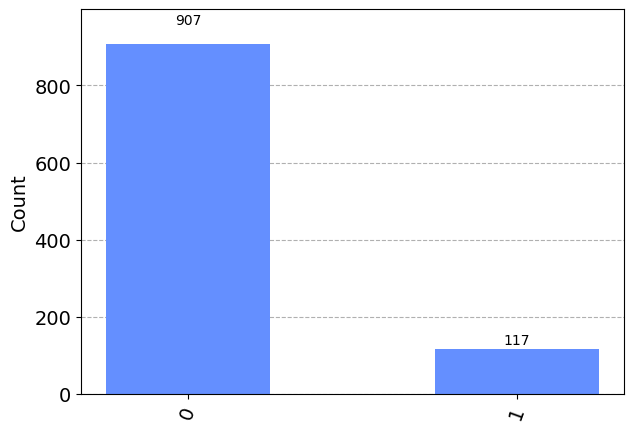

In [26]:
backend = Aer.get_backend('qasm_simulator')
counts= execute(qcX,backend, shots=1024).result().get_counts(qcX)
print(counts)
plot_histogram(counts)

## Multiple Independent Spins

$$\mathcal{H}=-\frac{1}{2}\hbar\omega\mathbf{Z}_{0}-\frac{1}{2}\hbar\omega\mathbf{Z}_{1}$$

$\begin{align}
\mathbf{U}_{t}=&\; e^{-i (t/\hbar)\mathcal{H}} \\
=&\; e^{i(\omega_{0} t \mathbf{Z}_{0} + \omega_{1} t \mathbf{Z}_{1})/2} \\
=&\; e^{i(\omega_{0} t/2) \mathbf{Z}_{0}}e^{i(\omega_{1} t/2) \mathbf{Z}_{1}} \qquad \color{blue}{\text{(because }\mathbf{Z}_{0}\mathbf{Z}_{1}=\mathbf{Z}_{1}\mathbf{Z}_{0})} \\
=&\; \begin{pmatrix} e^{i\omega_{0}t/2} & 0 \\ 0 & e^{-i\omega_{0}t/2} \end{pmatrix} \otimes \begin{pmatrix} e^{i\omega_{1}t/2} & 0 \\ 0 & e^{-i\omega_{1}t/2} \end{pmatrix}
\end{align}$

$\text{ Independent spins can be easily simulated!}$

## Non-diagonal Hamiltonians

Remember, we must diagonalize!

$\mathcal{H}=-\frac{1}{2}\hbar\omega\mathbf{X}$

$ $

$\mathbf{U}_{t} = e^{-i (t/\hbar) \mathcal{H}} = e^{i(\omega t/2)\mathbf{X}}$

$ $

$\mathbf{X} = \mathbf{HZH}$

$ $

$\begin{align} e^{i(\omega t/2)\mathbf{X}} =&\; e^{i(\omega t/2)\mathbf{HZH}} \\ & \\ =&\;\mathbf{H}e^{i(\omega t/2)\mathbf{Z}}\mathbf{H} \end{align}$


$\mathcal{H}=-\frac{1}{2}\hbar\omega\mathbf{Y}$

$ $

$\mathbf{U}_{t} = e^{-i (t/\hbar) \mathcal{H}} = e^{i(\omega t/2)\mathbf{Y}}$

$ $

$\mathbf{Y} = \mathbf{SHZHS}^{\dagger}$

$ $

$\begin{align} e^{i(\omega t/2)\mathbf{Y}} =&\; e^{i(\omega t/2)\mathbf{SHZHS}^{\dagger}} \\ & \\ =&\;\mathbf{SH}e^{i(\omega t/2)\mathbf{Z}}\mathbf{HS}^{\dagger} \end{align}$


### <font color=green>Exercise</font>

$\text{For the initial state }|\uparrow\rangle\text{ and the Hamiltonian }\mathcal{H}=-\frac{1}{2}\hbar\omega\mathbf{X} \text{ calculate the state at time }t=\pi/\omega.$

$\text{You may write it out rather than using Qiskit.}$

Looks like iX

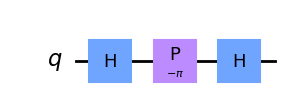

In [27]:
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.p(-np.pi,0)
qc2.h(0)
qc2.draw('mpl')

## Interacting Spins


$$\text{e.g. }\mathcal{H}=-\hbar J\mathbf{Z}_{1}\mathbf{Z}_{2} \qquad J\gt0 \text{ called ferromagnetic}$$

$ $

$$\begin{align}
\mathbf{U}_{t} =&\; e^{-it\mathcal{H}/\hbar} =\; e^{i(tJ)\mathbf{Z}_{1}\mathbf{Z}_{2}}\\ & \\
\mathbf{U}_{t}|\uparrow \uparrow\rangle =&\; e^{i(tJ)(+1)(+1)}|\uparrow \uparrow\rangle = e^{+i(tJ)}|\uparrow \uparrow\rangle \\ & \\
\mathbf{U}_{t}|\downarrow \downarrow\rangle =&\; e^{i(tJ)(-1)(-1)}|\downarrow \downarrow\rangle = e^{+i(tJ)}|\downarrow \downarrow\rangle \\ & \\
\mathbf{U}_{t}|\downarrow \uparrow\rangle =&\; e^{i(tJ)(-1)(+1)}|\downarrow \uparrow\rangle = e^{-i(tJ)}|\downarrow \uparrow\rangle \\ & \\
\mathbf{U}_{t}|\uparrow \downarrow\rangle =&\; e^{i(tJ)(+1)(-1)}|\uparrow \downarrow\rangle = e^{-i(tJ)}|\uparrow \downarrow\rangle
\end{align}
$$

We can implement this type of Hamiltonian using an auxilliary qubit as follows:

$$e^{i\alpha\mathbf{Z}_{1}\dots\mathbf{Z}_{n}}=\mathbf{C}_{10}\cdots\mathbf{C}_{n0}e^{i\alpha\mathbf{Z}_{0}}\mathbf{C}_{n0}\cdots\mathbf{C}_{10}$$

### Ising Model

$$\mathcal{H} = -\hbar\left(\sum_{i=1}^{n}h_{i}\mathbf{Z}_{i} + \sum_{i=1}^{n}\sum_{j=i+1}^{n}J_{ij}\mathbf{Z}_{i}\mathbf{Z}_{j} \right) $$

$\mathbf{U}_{t} =\; e^{-it\mathcal{H}/\hbar} =\; \prod_{i=1}^{n}e^{ith_{i}\mathbf{Z}_{i}} \prod_{i=1}^{n}\prod_{j=i+1}^{n} e^{itJ_{ij}\mathbf{Z}_{i}\mathbf{Z}_{j}}\qquad \qquad \color{blue}{\text{with }e^{itJ_{ij}\mathbf{Z}_{i}\mathbf{Z}_{j}}=\mathbf{C}_{i0}\mathbf{C}_{j0}e^{itJ_{ij}\mathbf{Z}_{0}}\mathbf{C}_{j0}\mathbf{C}_{i0}}$

### <font color=green>Exercise</font>


$$\mathcal{H} = -\frac{1}{2}\hbar\pi\left(\mathbf{Z}_{1}+\mathbf{Z}_{2}\right) - \hbar\pi\mathbf{Z}_{1}\mathbf{Z}_{2}$$

$1.\text{ Use Qiskit to prepare }\texttt{q[1]}\text{ and }\texttt{q[2]}\text{ in the state }|++\rangle=\frac{1}{2}\left(|\uparrow\rangle+|\downarrow\rangle\right)\otimes\left(|\uparrow\rangle+|\downarrow\rangle\right)$

$2.\text{ Evolve the state to time }t=0.25$

$3.\text{ Measure the observables }\mathbf{X}_{1},\mathbf{X}_{2}$

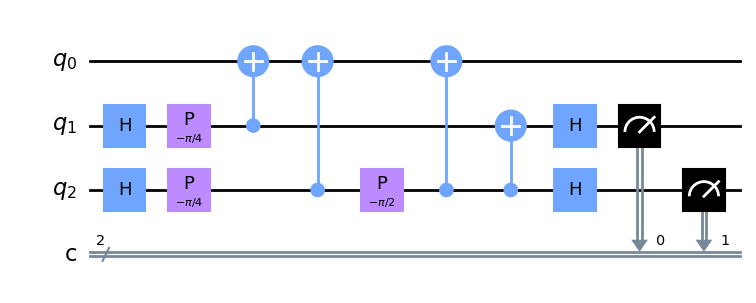

In [33]:
qc3 = QuantumCircuit(3,2)
qc3.h(1)
qc3.h(2)

#
qc3.p(-np.pi*0.25,1)
qc3.p(-np.pi*0.25,2)

qc3.cx(1,0)
qc3.cx(2,0)
qc3.p(-np.pi/2,2)

qc3.cx(2,0)
qc3.cx(2,1)

qc3.h(1)
qc3.h(2)
qc3.measure(1,0)
qc3.measure(2,1)
qc3.draw('mpl')

{'11': 74, '00': 79, '10': 404, '01': 467}


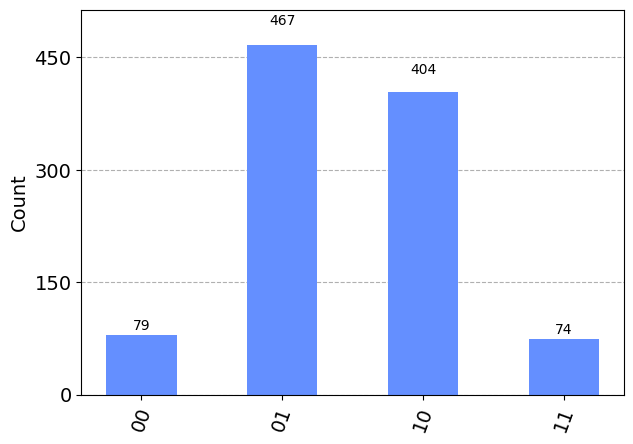

In [34]:
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc3,backend, shots=1024).result().get_counts(qc3)
print(counts)
plot_histogram(counts)

## Heisenberg Model

$$\mathcal{H} = -\hbar \sum_{i=1}^{n} \left( a_{i}\mathbf{X}_{i} + h_{i}\mathbf{Z}_{i} \right) - \hbar \sum_{i=1}^{n}\sum_{j=i+1}^{n} \left(A_{ij}\mathbf{X}_{i}\mathbf{X}_{j}+J_{ij}\mathbf{Z}_{i}\mathbf{Z}_{j} \right)$$

$ $

$\mathbf{U}_{t} = e^{-i t/\hbar \mathcal{H}} \approx \prod_{k=1}^{K} e^{-i(\mathcal{H}/\hbar)(t/K)}\qquad\text{for large K}$

$ $

$e^{-i(\mathcal{H}/\hbar)(t/K)} = \prod_{i=1}^{n} e^{i(a_{i}t/K)\mathbf{X}_{i}}e^{i(h_{i}t/K)\mathbf{Z}_{i}}\prod_{i=1}^{n}\prod_{j=i+1}^{n}e^{i(A_{ij}t/K)\mathbf{X}_{i}\mathbf{X}_{j}}e^{i(J_{ij}t/K)\mathbf{Z}_{i}\mathbf{Z}_{j}}$

$$\text{Use }e^{i\alpha\mathbf{X}_{1}\cdots\mathbf{X}_{n}} = \mathbf{H}_{1}\cdots\mathbf{H}_{n}e^{i\alpha\mathbf{Z}_{1}\cdots\mathbf{Z}_{n}}\mathbf{H}_{n}\cdots\mathbf{H}_{1}$$

## Time Dependent Hamiltonians

$\mathcal{H}(t) = \text{ Hamiltonian at time }t$

$\begin{align}
\mathbf{U}_{t} =& \;\exp \left[-\frac{i}{\hbar} \int_{0}^{t} \mathcal{H}(s)ds \right] \\
\approx & \;\exp \left[ -\frac{i}{\hbar} \sum_{k=1}^{K} \mathcal{H}(k\Delta t)\Delta t \right] =\;\exp \left[ -\frac{i}{\hbar}\big( \mathcal{H}(\Delta t) + \mathcal{H}(2\Delta t) + \cdots + \mathcal{H}(K\Delta t) \big)\Delta t\right] \\
\approx & \; \exp \left[ -\frac{i}{\hbar} \mathcal{H}(\Delta t)\Delta t \right] \exp \left[ -\frac{i}{\hbar} \mathcal{H}(2\Delta t)\Delta t \right] \cdots \exp \left[ -\frac{i}{\hbar} \mathcal{H}(K\Delta t)\Delta t \right]
\end{align}
$

$\text{ with }\Delta t = \frac{t}{K}$

### <font color=green>Exercise</font>

$$\text{Approximate }\mathbf{U}_{t}\text{ in terms of elementary gate operations for the Hamiltonian }\mathcal{H}=-\hbar \big(a\mathbf{X}+b\mathbf{Y}+c\mathbf{Z}\big)$$

$\mathbf{U}_{t} = e^{-i t/\hbar \mathcal{H}} \approx \prod_{k=1}^{K} e^{-i(\mathcal{H}/\hbar)(t/K)}\qquad\text{for large K}$

then use fact that X is HZH, that Y is SHZHSdg, Product of all of the phases surrounded
$\prod_{k=1}^{K} He^{-i(\mathcal{Z}/\hbar)(at/K)}HSHe^{-i(\mathcal{Z}/\hbar)(bt/K)}HSdge^{-i(\mathcal{Z}/\hbar)(xt/K)}\qquad\$